In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [40]:
bias =100
X,y,coef = make_regression(n_features=1,bias=bias,noise = 10,random_state=42,coef=True)

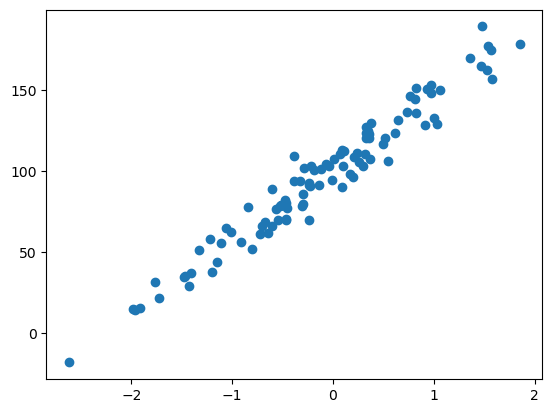

In [41]:
plt.scatter(x = X,y=y)

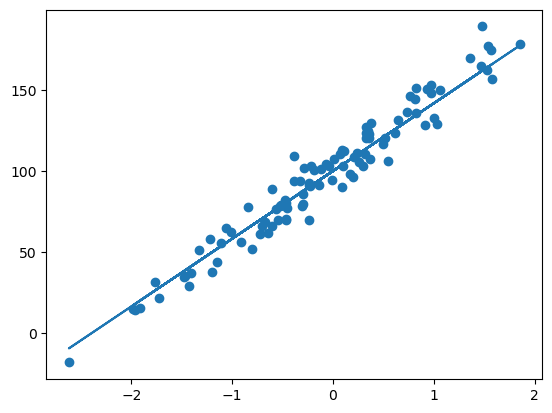

In [42]:
plt.scatter(X,y)
ynew = coef*X+bias
plt.plot(X,ynew)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X,y)

LinearRegression()

In [46]:
model.coef_,model.intercept_

(array([44.43716999]), 101.165115320527)

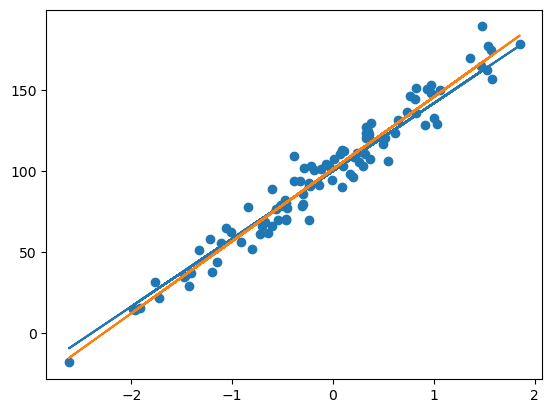

In [47]:
plt.scatter(X,y)
ypred = model.coef_*X + model.intercept_
plt.plot(X,ynew)
plt.plot(X,ypred)

## Custom Linear Regression

In [81]:
class CustomLR:
    def __init__(self,lr=0.1):
        self.lr = lr
    def fit(self,X,y):
        self.X = X
        self.y = y.reshape(-1,1)
        
        self.coef_ = 1
        self.bias_ = 1
        
        self.errors = []
        
        # for i in range(50):
        #     self.gradient_descent()
        #     self.errors.append(self.error())
            
    def error(self):
        yh = self.coef_*self.X + self.bias_
        return ((yh-self.y)**2).mean()
    def gradient_descent(self):
        dcoef,dbias = self.gradient()
        self.coef_ += self.lr*dcoef
        self.bias_ +=self.lr*dbias
        
    def gradient(self):
        yh = self.coef_*self.X + self.bias_
        dcoef = (2*(self.y-yh)*self.X).mean()
        dbias = (2*(self.y - yh)).mean()
        return (dcoef,dbias)
    
    def predict_point(self,X):
        return np.array(self.coef_*X + self.bias_)
    def predict(self,X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results)

In [82]:
customModel = CustomLR()

In [83]:
customModel.fit(X,y)

In [84]:
customModel.gradient()

(51.068091464048806, 191.3086329827521)

In [80]:
customModel.coef_,customModel.bias_

(44.42176738095609, 101.15727369151571)

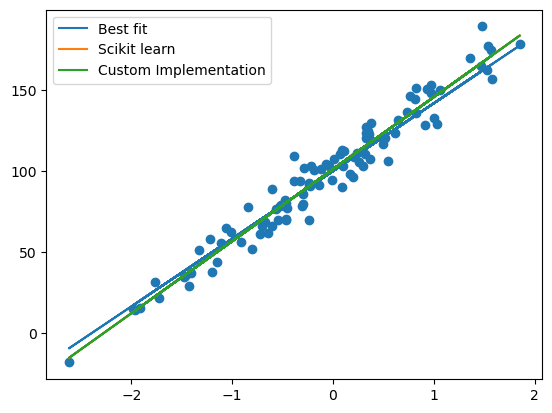

In [70]:
plt.scatter(X,y)
ypred = model.coef_*X + model.intercept_
plt.plot(X,ynew,label="Best fit")
plt.plot(X,model.predict(X),label="Scikit learn")
plt.plot(X,customModel.predict(X),label="Custom Implementation")
plt.legend()

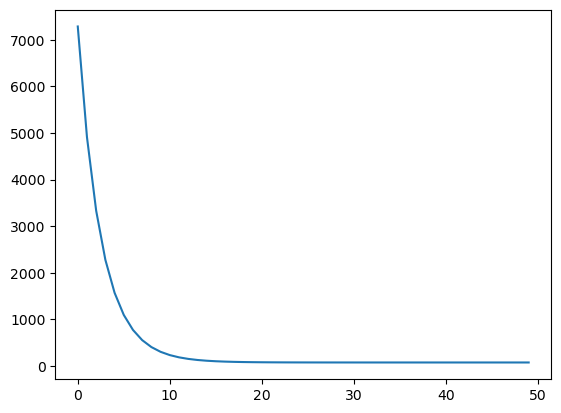

In [71]:
plt.plot(customModel.errors)

In [72]:
temp = np.array([[1,2],[3,4]])
temp.shape

(2, 2)